## Преобработка данных для анализа

Ссылка на данные: https://drive.google.com/drive/folders/1atMrzGzv4Swob8kS_bYVz8isOI-hGxqT?usp=sharing


### Обработка категориальных данных

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

In [46]:
file_path = 'dataset/left.csv'
data = pd.read_csv(file_path, header=None)
data.head(10)

/var/folders/fq/3g_66wjn7h7gfmsyw5r8719c0000gs/T/ipykernel_1338/865358873.py:2: DtypeWarning: Columns (3,5,9,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, header=None)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,"Клиент Имя Фамилия (e-17361850), период 01.10....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Всего,NaN,Ср.расход за день (руб.),Показы,Клики,CTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. цена тыс. показов (руб.),Глубина (стр.),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,с 01.10.2023 по 31.03.2024,NaN,1234.57,408716,2504,0.61,100000,39.94,244.67,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Дата,Тип кампании,Кампания,№ Кампании,Группа,№ Группы,№ Объявления,Тип объявления,Условие показа,№ Условия показа,...,Пол,Категория таргетинга,Упоминание брендов,Уровень платежеспособности,Возраст,Тип инвентаря,Жанры и тематики,Заголовок,Текст,Ссылка
5,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Сип дома,5299980890,M-15139002616,Текстово-графическое объявление,проекты домов из сип панелей,47674166677,...,мужской,Целевые запросы,не определено,Остальные,45-54,Баннеры,Не определено,СИП дома с гарантией 10 лет от застройщика,"Проектирование, изготовление, раскрой и сборка...",https://sip-irk.ru?utm_source=yandex&utm_mediu...
6,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Сип дома,5299980890,M-15139002617,Текстово-графическое объявление,дом из сип панелей,47674166665,...,мужской,Целевые запросы,не определено,Остальные,35-44,Баннеры,Не определено,СИП дома под ключ от застройщика. Специалисты ...,СИП дома с гарантией 10 лет. Строим с точным ...,https://sip-irk.ru?utm_source=yandex&utm_mediu...
7,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Каркасные дома,5302105044,M-15139002606,Текстово-графическое объявление,каркасные дома иркутск,47674166588,...,мужской,Альтернативные запросы,не определено,6-10%,45-54,Баннеры,Не определено,СИП дома под ключ от производителя,Собственное производство. Без посредников и п...,NaN
8,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Каркасные дома,5302105044,M-15139002606,Текстово-графическое объявление,каркасный дом,47674166587,...,мужской,Альтернативные запросы,не определено,Остальные,25-34,Баннеры,Не определено,СИП дома под ключ от производителя,Собственное производство. Без посредников и п...,NaN
9,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Каркасные дома,5302105044,M-15139002606,Текстово-графическое объявление,каркасный дом,47674166587,...,женский,Широкие запросы,не определено,Остальные,45-54,Баннеры,Не определено,СИП дома под ключ от производителя,Собственное производство. Без посредников и п...,NaN


#### Что можно сказать о данных? 
* Датасет содержит вперемешку данные из разных ресурсов.
* C 5 строки преимущественно данные категориальные, первая колонка timestamp.
* Данные о рекламе домов на некотором веб-ресурсе.


#### Что можно сделать с данными на первом этапе? 
* Почистить данные от лишних строк.
* Убрать колонки в которых идентичные данны?
* Построить распредления по разным колонкам данных;
* Закодировать данные: one-hot / labael-encoding: в чем разница между подходами?

In [47]:
data = pd.read_csv(file_path, header=4)[:1000]

data.head(5)

/var/folders/fq/3g_66wjn7h7gfmsyw5r8719c0000gs/T/ipykernel_1338/2277980532.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, header=4)[:1000]


,Дата,Тип кампании,Кампания,№ Кампании,Группа,№ Группы,№ Объявления,Тип объявления,Условие показа,№ Условия показа,...,Пол,Категория таргетинга,Упоминание брендов,Уровень платежеспособности,Возраст,Тип инвентаря,Жанры и тематики,Заголовок,Текст,Ссылка
0,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Сип дома,5299980890,M-15139002616,Текстово-графическое объявление,проекты домов из сип панелей,47674166677,...,мужской,Целевые запросы,не определено,Остальные,45-54,Баннеры,Не определено,СИП дома с гарантией 10 лет от застройщика,"Проектирование, изготовление, раскрой и сборка...",https://sip-irk.ru?utm_source=yandex&utm_mediu...
1,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Сип дома,5299980890,M-15139002617,Текстово-графическое объявление,дом из сип панелей,47674166665,...,мужской,Целевые запросы,не определено,Остальные,35-44,Баннеры,Не определено,СИП дома под ключ от застройщика. Специалисты ...,СИП дома с гарантией 10 лет. Строим с точным ...,https://sip-irk.ru?utm_source=yandex&utm_mediu...
2,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Каркасные дома,5302105044,M-15139002606,Текстово-графическое объявление,каркасные дома иркутск,47674166588,...,мужской,Альтернативные запросы,не определено,6-10%,45-54,Баннеры,Не определено,СИП дома под ключ от производителя,Собственное производство. Без посредников и п...,NaN
3,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Каркасные дома,5302105044,M-15139002606,Текстово-графическое объявление,каркасный дом,47674166587,...,мужской,Альтернативные запросы,не определено,Остальные,25-34,Баннеры,Не определено,СИП дома под ключ от производителя,Собственное производство. Без посредников и п...,NaN
4,02.10.2023,Текстово-графические объявления,Поиск_сип_ дома,97511163,Каркасные дома,5302105044,M-15139002606,Текстово-графическое объявление,каркасный дом,47674166587,...,женский,Широкие запросы,не определено,Остальные,45-54,Баннеры,Не определено,СИП дома под ключ от производителя,Собственное производство. Без посредников и п...,NaN


In [27]:
# Убираем колонки, в которых все данные одинаковые
columns_to_drop = [col for col in data.columns if data[col].nunique() <= 1]
data = data.drop(columns=columns_to_drop)

# Посмотрим, какие колонки были удалены
columns_to_drop


['Тип кампании',
 'Кампания',
 '№ Кампании',
 'Тип объявления',
 'Условие подбора (корректировки)',
 'Упоминание брендов',
 'Жанры и тематики',
 'Ссылка']

In [28]:
print(data.keys())
data.head(2)

Index(['Дата', 'Группа', '№ Группы', '№ Объявления', 'Условие показа',
       '№ Условия показа', 'Тип условия показа', 'Тип соответствия',
       'Тип площадки', 'Турбо-площадка', 'Внешние сети', 'Регион таргетинга',
       'Регион местонахождения', 'Вид размещения', 'Формат',
       'Размер изображения', 'Тип устройства', 'Тип операционной системы',
       'Тип связи', 'Пол', 'Категория таргетинга',
       'Уровень платежеспособности', 'Возраст', 'Тип инвентаря', 'Заголовок',
       'Текст'],
      dtype='object')


,Дата,Группа,№ Группы,№ Объявления,Условие показа,№ Условия показа,Тип условия показа,Тип соответствия,Тип площадки,Турбо-площадка,...,Тип устройства,Тип операционной системы,Тип связи,Пол,Категория таргетинга,Уровень платежеспособности,Возраст,Тип инвентаря,Заголовок,Текст
0,02.10.2023,Сип дома,5299980890,M-15139002616,проекты домов из сип панелей,47674166677,фраза,пословное,поиск,-,...,мобильные,Android,Wi-Fi,мужской,Целевые запросы,Остальные,45-54,Баннеры,СИП дома с гарантией 10 лет от застройщика,"Проектирование, изготовление, раскрой и сборка..."
1,02.10.2023,Сип дома,5299980890,M-15139002617,дом из сип панелей,47674166665,фраза,пословное,поиск,-,...,мобильные,Android,Wi-Fi,мужской,Целевые запросы,Остальные,35-44,Баннеры,СИП дома под ключ от застройщика. Специалисты ...,СИП дома с гарантией 10 лет. Строим с точным ...


## Какие вопросы можно задать к данным?

1) Соотношение мужчин и женщин разного возраста?
2) Как меняются тип условия показа от операционной системы и типа устройства и типа инвентаря?
3) Тип операционной системы и уровень платежеспособности.
4) Регион таргетинга и уровень платежеспособности.
5) Группа (что продают) в зависимости от возраста и типа операционной системы.

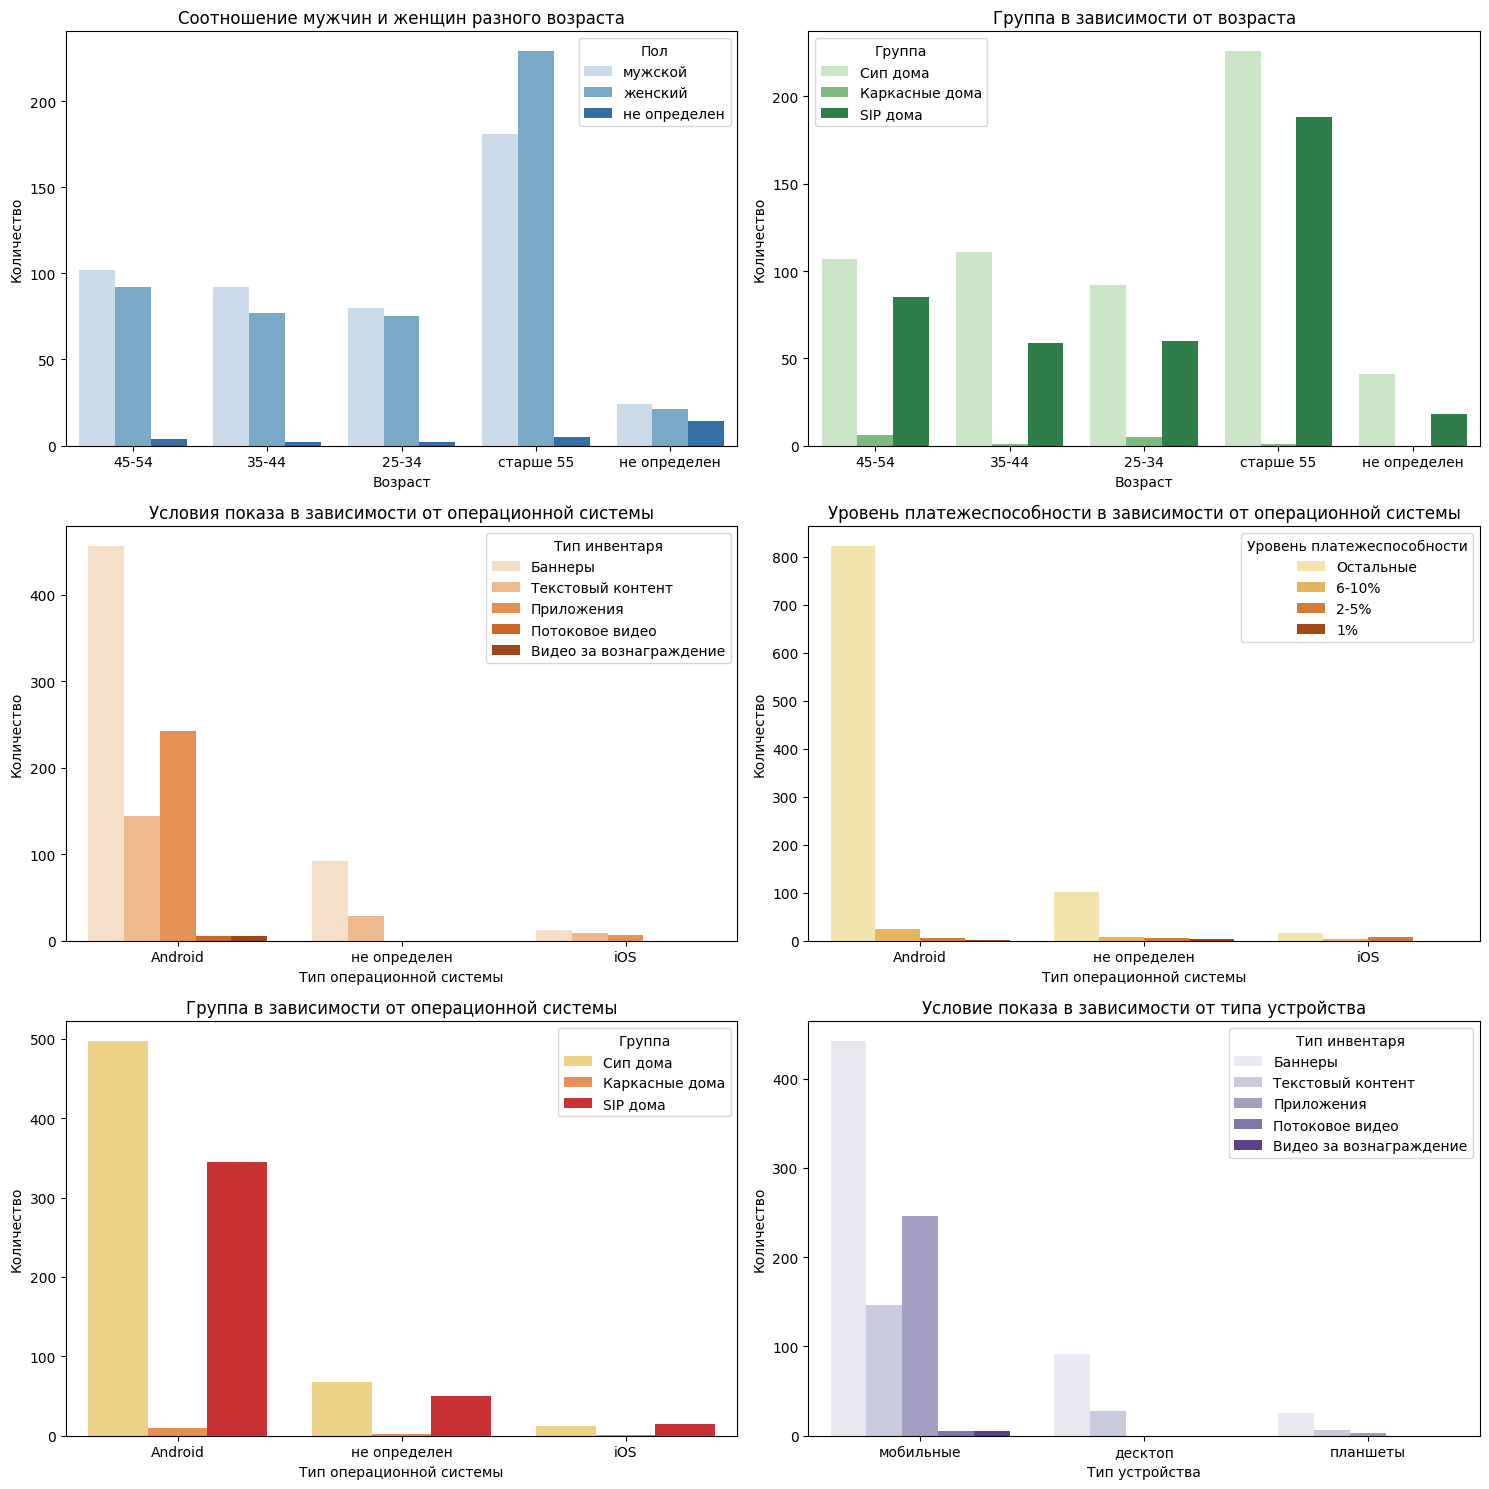

In [29]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])


ax1 = plt.subplot(gs[0, 0])
sns.countplot(data=data, x='Возраст', hue='Пол', palette='Blues', ax=ax1)
ax1.set_title('Соотношение мужчин и женщин разного возраста')
ax1.set_ylabel('Количество')
ax1.set_xlabel('Возраст')


ax2 = plt.subplot(gs[0, 1])
sns.countplot(data=data, x='Возраст', hue='Группа', palette='Greens', ax=ax2)
ax2.set_title('Группа в зависимости от возраста')
ax2.set_ylabel('Количество')
ax2.set_xlabel('Возраст')

ax3 = plt.subplot(gs[1, 0])
sns.countplot(data=data, x='Тип операционной системы', hue='Тип инвентаря', palette='Oranges', ax=ax3)
ax3.set_title('Условия показа в зависимости от операционной системы')
ax3.set_ylabel('Количество')
ax3.set_xlabel('Тип операционной системы')


ax4 = plt.subplot(gs[1, 1])
sns.countplot(data=data, x='Тип операционной системы', hue='Уровень платежеспособности', palette='YlOrBr', ax=ax4)
ax4.set_title('Уровень платежеспособности в зависимости от операционной системы')
ax4.set_ylabel('Количество')
ax4.set_xlabel('Тип операционной системы')

ax5 = plt.subplot(gs[2, 0])
sns.countplot(data=data, x='Тип операционной системы', hue='Группа', palette='YlOrRd', ax=ax5)
ax5.set_title('Группа в зависимости от операционной системы')
ax5.set_ylabel('Количество')
ax5.set_xlabel('Тип операционной системы')


ax6 = plt.subplot(gs[2, 1])
sns.countplot(data=data, x='Тип устройства', hue='Тип инвентаря', palette='Purples', ax=ax6)
ax6.set_title('Условие показа в зависимости от типа устройства')
ax6.set_ylabel('Количество')
ax6.set_xlabel('Тип устройства')

# Adjust the layout
plt.tight_layout()
plt.show()


## Убираем из графиков данные, где типо категории "не опреден" или "Остальные"

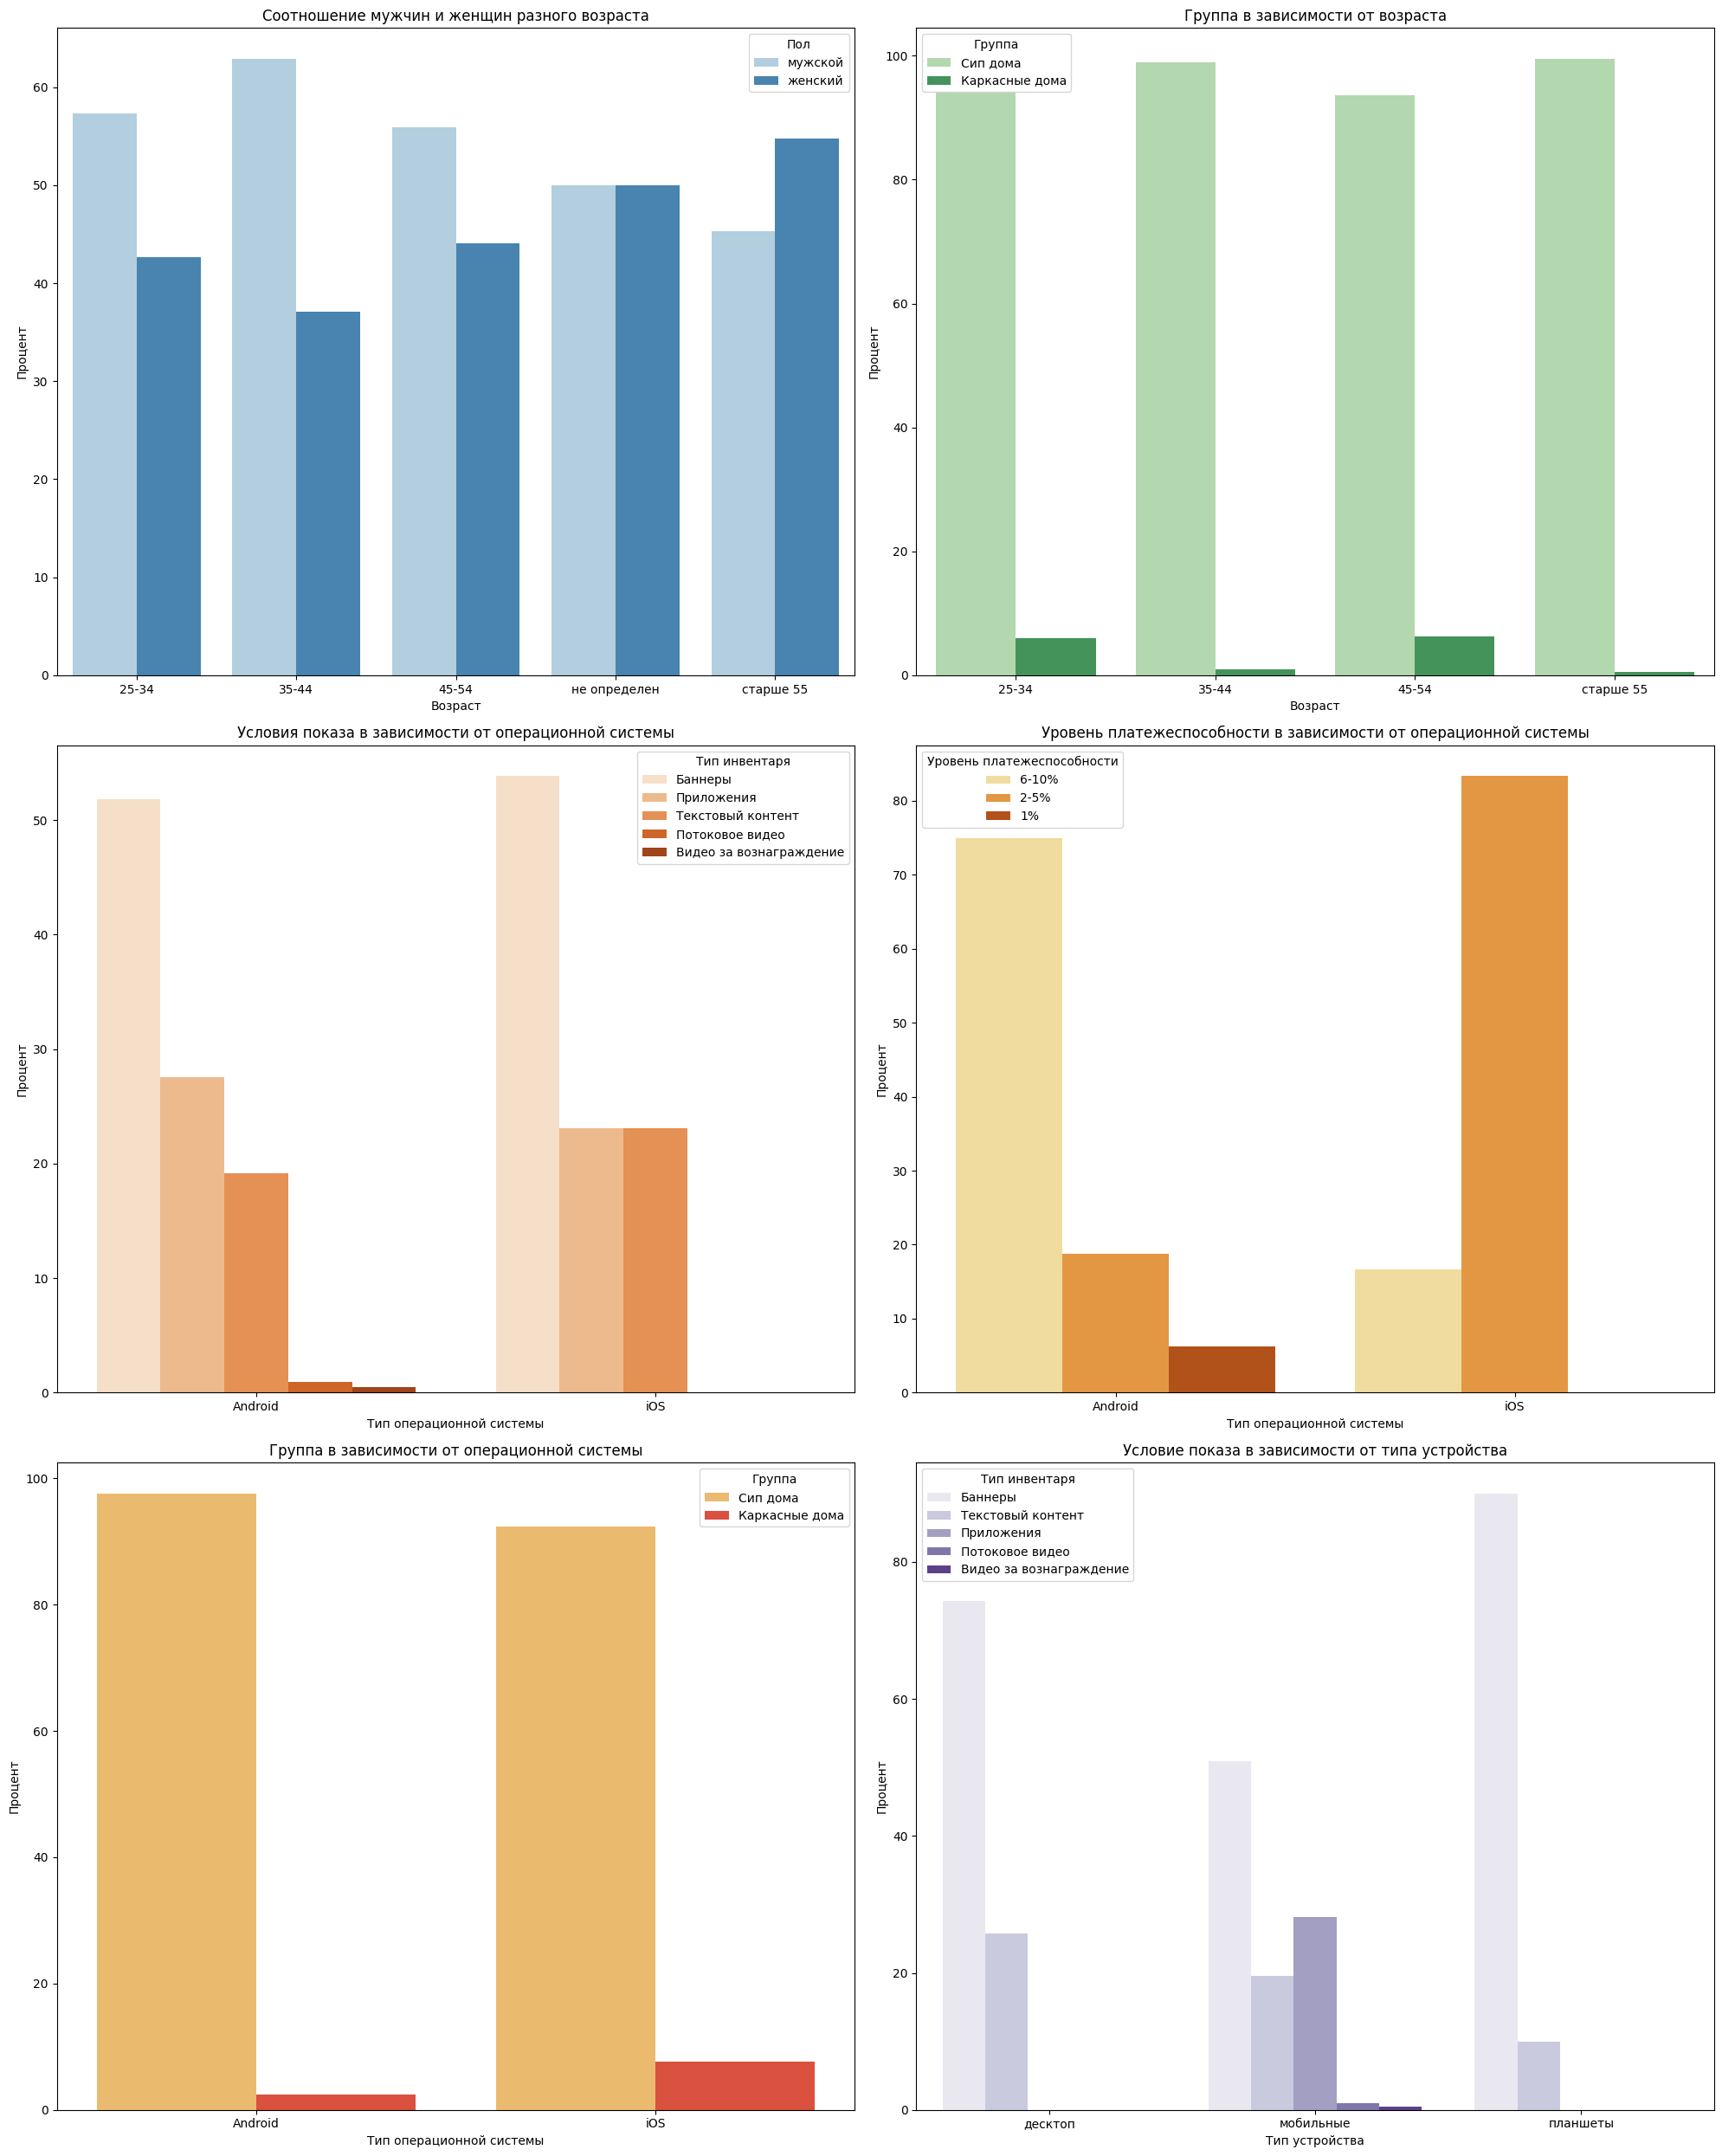

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Функция для преобразования данных в проценты
def to_percent(df, group_col, count_col):
    df_grouped = df.groupby(group_col)[count_col].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    return df_grouped

plt.figure(figsize=(20, 25))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

# 1) Соотношение мужчин и женщин разного возраста (Сине-зеленый)
ax1 = plt.subplot(gs[0, 0])
gender_percent = to_percent(filtered_gender, 'Возраст', 'Пол')
sns.barplot(data=gender_percent, x='Возраст', y='percent', hue='Пол', palette='Blues', ax=ax1)
ax1.set_title('Соотношение мужчин и женщин разного возраста')
ax1.set_ylabel('Процент')
ax1.set_xlabel('Возраст')

# 2) Группа в зависимости от возраста (Сине-зеленый)
ax2 = plt.subplot(gs[0, 1])
group_age_percent = to_percent(filtered_group_age, 'Возраст', 'Группа')
sns.barplot(data=group_age_percent, x='Возраст', y='percent', hue='Группа', palette='Greens', ax=ax2)
ax2.set_title('Группа в зависимости от возраста')
ax2.set_ylabel('Процент')
ax2.set_xlabel('Возраст')

# 3) Условия показа в зависимости от операционной системы (Оранжево-желтый)
ax3 = plt.subplot(gs[1, 0])
inventory_os_percent = to_percent(filtered_inventory_os, 'Тип операционной системы', 'Тип инвентаря')
sns.barplot(data=inventory_os_percent, x='Тип операционной системы', y='percent', hue='Тип инвентаря', palette='Oranges', ax=ax3)
ax3.set_title('Условия показа в зависимости от операционной системы')
ax3.set_ylabel('Процент')
ax3.set_xlabel('Тип операционной системы')

# 4) Уровень платежеспособности в зависимости от операционной системы (Оранжево-желтый)
ax4 = plt.subplot(gs[1, 1])
income_os_percent = to_percent(filtered_income_os, 'Тип операционной системы', 'Уровень платежеспособности')
sns.barplot(data=income_os_percent, x='Тип операционной системы', y='percent', hue='Уровень платежеспособности', palette='YlOrBr', ax=ax4)
ax4.set_title('Уровень платежеспособности в зависимости от операционной системы')
ax4.set_ylabel('Процент')
ax4.set_xlabel('Тип операционной системы')

# 5) Группа в зависимости от операционной системы (Оранжево-желтый)
ax5 = plt.subplot(gs[2, 0])
group_os_percent = to_percent(filtered_group_os, 'Тип операционной системы', 'Группа')
sns.barplot(data=group_os_percent, x='Тип операционной системы', y='percent', hue='Группа', palette='YlOrRd', ax=ax5)
ax5.set_title('Группа в зависимости от операционной системы')
ax5.set_ylabel('Процент')
ax5.set_xlabel('Тип операционной системы')

# 6) Условие показа в зависимости от типа устройства (Фиолетово-розовый)
ax6 = plt.subplot(gs[2, 1])
inventory_device_percent = to_percent(filtered_inventory_device, 'Тип устройства', 'Тип инвентаря')
sns.barplot(data=inventory_device_percent, x='Тип устройства', y='percent', hue='Тип инвентаря', palette='Purples', ax=ax6)
ax6.set_title('Условие показа в зависимости от типа устройства')
ax6.set_ylabel('Процент')
ax6.set_xlabel('Тип устройства')

# Adjust the layout
plt.tight_layout()
plt.show()


### Работа с категориальными данными

In [38]:
encoding_dict = {}
for column in data.columns[1:]:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    encoding_dict[column] = dict(zip(le.classes_, le.transform(le.classes_)))

pickle_file_path = 'encoding_dict.pkl'
with open(pickle_file_path, 'wb') as f:
    pickle.dump(encoding_dict, f)

data.to_csv("label_ecoded_1000.csv")
encoded_data_head = data.head()
encoded_data_head

,Дата,Тип кампании,Кампания,№ Кампании,Группа,№ Группы,№ Объявления,Тип объявления,Условие показа,№ Условия показа,...,Пол,Категория таргетинга,Упоминание брендов,Уровень платежеспособности,Возраст,Тип инвентаря,Жанры и тематики,Заголовок,Текст,Ссылка
0,02.10.2023,0,0,0,2,0,15,0,8,3,...,1,1,0,3,2,0,0,7,2,0
1,02.10.2023,0,0,0,2,0,16,0,1,10,...,1,1,0,3,1,0,0,4,3,0
2,02.10.2023,0,0,0,1,2,8,0,5,7,...,1,0,0,2,2,0,0,5,5,1
3,02.10.2023,0,0,0,1,2,8,0,6,6,...,1,0,0,3,0,0,0,5,5,1
4,02.10.2023,0,0,0,1,2,8,0,6,6,...,0,2,0,3,2,0,0,5,5,1


### Работа с OneHot

In [48]:
import pandas as pd


date_column = data.columns[0]
exclude_columns = ['Заголовок', 'Текст']
columns_to_encode = [col for col in data.columns if col not in exclude_columns + [date_column]]
df_encoded = pd.get_dummies(data, columns=columns_to_encode)


In [52]:
df_encoded.head(3)

,Дата,Заголовок,Текст,Тип кампании_Текстово-графические объявления,Кампания_Поиск_сип_ дома,№ Кампании_97511163,Группа_SIP дома,Группа_Каркасные дома,Группа_Сип дома,№ Группы_5299980890,...,Возраст_45-54,Возраст_не определен,Возраст_старше 55,Тип инвентаря_Баннеры,Тип инвентаря_Видео за вознаграждение,Тип инвентаря_Потоковое видео,Тип инвентаря_Приложения,Тип инвентаря_Текстовый контент,Жанры и тематики_Не определено,Ссылка_https://sip-irk.ru?utm_source=yandex&utm_medium=cpc&utm_campaign={campaign_name}&utm_content={ad_id}&utm_term={PHRASE}.{device_type}.{region_name}.{retargeting_id}.{addphrasestext}&block={position_type}.{position}
0,02.10.2023,СИП дома с гарантией 10 лет от застройщика,"Проектирование, изготовление, раскрой и сборка...",True,True,True,False,False,True,True,...,True,False,False,True,False,False,False,False,True,True
1,02.10.2023,СИП дома под ключ от застройщика. Специалисты ...,СИП дома с гарантией 10 лет. Строим с точным ...,True,True,True,False,False,True,True,...,False,False,False,True,False,False,False,False,True,True
2,02.10.2023,СИП дома под ключ от производителя,Собственное производство. Без посредников и п...,True,True,True,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False


In [53]:
column_mapping = {col: f"col_{i+1}" for i, col in enumerate(df_encoded.columns)}
df_renamed = df_encoded.rename(columns=column_mapping)
column_mapping

{'Дата': 'col_1',
 'Заголовок': 'col_2',
 'Текст': 'col_3',
 'Тип кампании_Текстово-графические объявления': 'col_4',
 'Кампания_Поиск_сип_ дома': 'col_5',
 '№ Кампании_97511163': 'col_6',
 'Группа_SIP дома': 'col_7',
 'Группа_Каркасные дома': 'col_8',
 'Группа_Сип дома': 'col_9',
 '№ Группы_5299980890': 'col_10',
 '№ Группы_5302105040': 'col_11',
 '№ Группы_5302105044': 'col_12',
 '№ Объявления_M-15126352596': 'col_13',
 '№ Объявления_M-15139002580': 'col_14',
 '№ Объявления_M-15139002581': 'col_15',
 '№ Объявления_M-15139002582': 'col_16',
 '№ Объявления_M-15139002584': 'col_17',
 '№ Объявления_M-15139002585': 'col_18',
 '№ Объявления_M-15139002586': 'col_19',
 '№ Объявления_M-15139002606': 'col_20',
 '№ Объявления_M-15139002607': 'col_21',
 '№ Объявления_M-15139002609': 'col_22',
 '№ Объявления_M-15139002610': 'col_23',
 '№ Объявления_M-15139002611': 'col_24',
 '№ Объявления_M-15139002614': 'col_25',
 '№ Объявления_M-15139002615': 'col_26',
 '№ Объявления_M-15139002616': 'col_27',
 

In [55]:
df_renamed.to_csv("binary_encoding.csv")

### Работа с вещественными признаками

In [60]:
data = pd.read_csv("dataset/right.csv")

In [61]:
data.head(5)

,"Клиент Имя Фамилия (e-17361850), период 01.10.2023 - 31.03.2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Всего,NaN,Ср.расход за день (руб.),Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
1,с 01.10.2023 по 31.03.2024,NaN,1234.57,408716,406973.39,2504,0.61,0.62,100000,39.94,...,-,-,-,-,0,-,-,-,-,-
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Дата,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,...,Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)",NaN,NaN
4,02.10.2023,15,16.18,5,33.33,30.9,213.82,42.76,157.9,1,...,-,-,-,-,-,-,-,-,NaN,NaN


In [70]:
data = pd.read_csv("dataset/right.csv", header=4)[:100]

data.head(100)

,Дата,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,...,Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)",Unnamed: 41,Unnamed: 42
0,02.10.2023,15,16.18,5,33.33,30.90,213.82,42.76,157.9,1.00,...,-,-,-,-,-,-,-,-,NaN,NaN
1,03.10.2023,12826,12829.48,151,1.18,1.18,2699.99,17.88,67.14,1.10,...,-,-,-,-,-,-,-,-,NaN,NaN
2,04.10.2023,12562,12554.37,152,1.21,1.21,2958.77,19.47,32.76,1.72,...,-,-,-,-,-,-,-,-,NaN,NaN
3,05.10.2023,619,614.66,14,2.26,2.28,1444.50,103.18,212.91,1.40,...,-,-,-,-,-,-,-,-,NaN,NaN
4,06.10.2023,1591,1579.15,29,1.82,1.84,446.83,15.41,50.96,2.82,...,-,-,-,-,-,-,-,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,17.03.2024,18823,18807.91,64,0.34,0.34,2700.00,42.19,32.78,3.77,...,-,-,-,-,-,-,-,-,NaN,NaN
88,18.03.2024,19465,19442.26,52,0.27,0.27,2460.00,47.31,64.98,3.10,...,-,-,-,-,-,-,-,-,NaN,NaN
89,19.03.2024,23636,23626.64,39,0.17,0.17,2122.69,54.43,80.01,2.59,...,-,-,-,-,-,-,-,-,NaN,NaN
90,20.03.2024,57053,57043.66,95,0.17,0.17,5739.21,60.41,42.12,2.53,...,-,-,-,-,-,-,-,-,NaN,NaN


In [65]:
data.keys()

Index(['Дата', 'Показы', 'Взвешенные показы', 'Клики', 'CTR (%)', 'wCTR (%)',
       'Расход (руб.)', 'Ср. цена клика (руб.)', 'Ср. ставка за клик (руб.)',
       'Ср. позиция показов', 'Ср. объём трафика', 'Ср. позиция кликов',
       'Отказы (%)', 'Ср. цена тыс. показов (руб.)', 'Охват',
       'Ср. частота показов', 'Глубина (стр.)', 'Конверсия (%)',
       'Цена цели (руб.)', 'Конверсии', 'Рентабельность',
       'Доля рекламных расходов', 'Доход (руб.)', 'Прибыль (руб.)', 'Сумма ВC',
       'Цена ВC (руб.)', 'Доля ВC (%)', 'Проигрывание 25% ролика',
       'Проигрывание 50% ролика', 'Проигрывание 75% ролика',
       'Проигрывание 100% ролика', 'Доля проигрываний 25% ролика (%)',
       'Доля проигрываний 50% ролика (%)', 'Доля проигрываний 75% ролика (%)',
       'Доля проигрываний 100% ролика (%)',
       'Ср. цена досмотра 100% ролика (руб.)', 'Видимые показы, стандарт MRC',
       'Невидимые показы, стандарт MRC',
       'Неустановленные показы, стандарт MRC',
       'Доля изме

In [67]:
columns_with_numeric = data.select_dtypes(include=['float64', 'int64']).columns
columns_with_values = data[columns_with_numeric].dropna(how='all', axis=1).columns


cleaned_data = data[columns_with_values]

In [68]:
cleaned_data

,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. позиция показов,Ср. объём трафика,Ср. цена тыс. показов (руб.),Охват,Ср. частота показов,Доход (руб.),Прибыль (руб.)
0,15,16.18,5,33.33,30.90,213.82,1.00,107.86,14254.93,11,1.36,0,-213.82
1,12826,12829.48,151,1.18,1.18,2699.99,1.10,100.03,210.51,9200,1.39,0,-2699.99
2,12562,12554.37,152,1.21,1.21,2958.77,1.72,99.94,235.53,9950,1.26,0,-2958.77
3,619,614.66,14,2.26,2.28,1444.50,1.40,99.30,2333.60,499,1.24,0,-1444.50
4,1591,1579.15,29,1.82,1.84,446.83,2.82,99.25,280.85,1319,1.21,0,-446.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,18823,18807.91,64,0.34,0.34,2700.00,3.77,99.92,143.44,6493,2.90,0,-2700.00
88,19465,19442.26,52,0.27,0.27,2460.00,3.10,99.88,126.38,7121,2.73,0,-2460.00
89,23636,23626.64,39,0.17,0.17,2122.69,2.59,99.96,89.81,7952,2.97,0,-2122.69
90,57053,57043.66,95,0.17,0.17,5739.21,2.53,99.98,100.59,19040,3.00,0,-5739.21


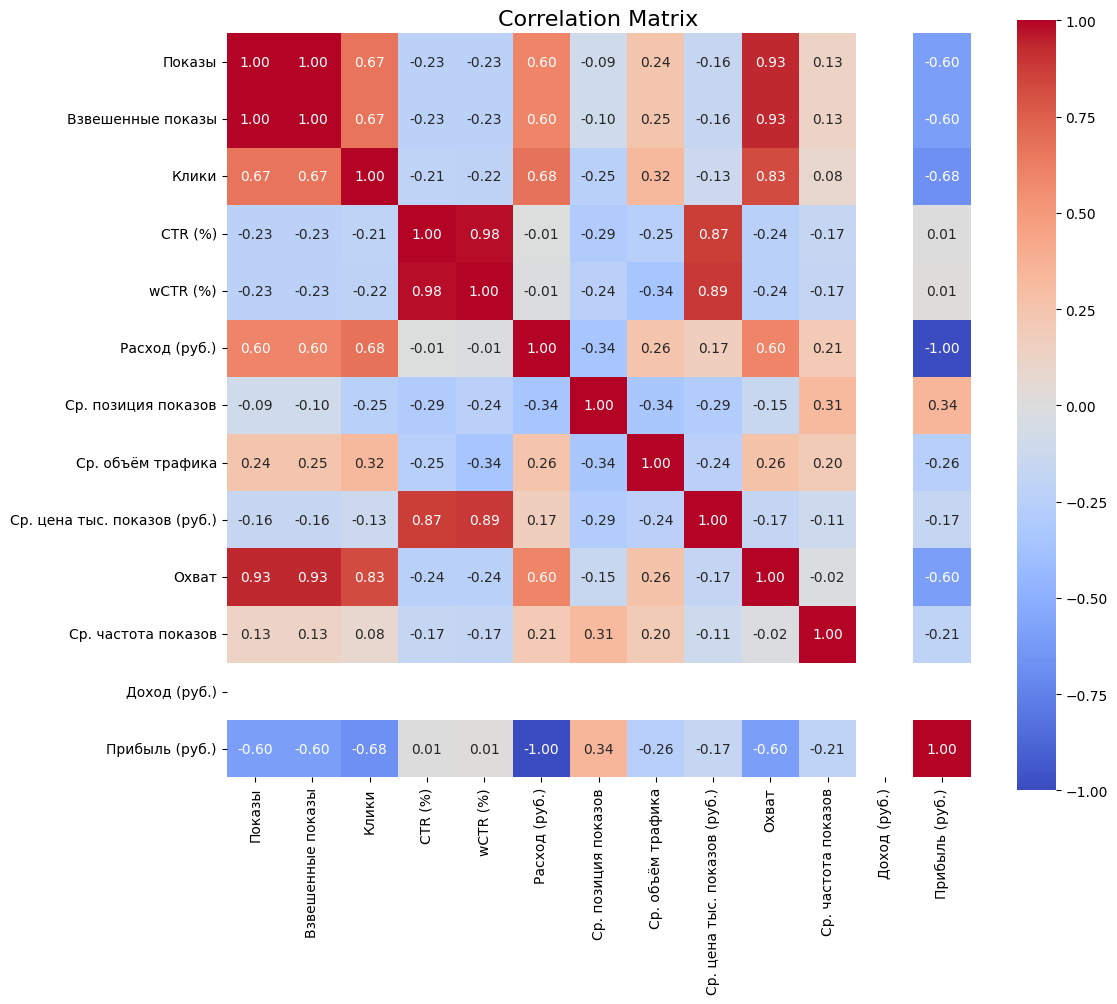

In [72]:
correlation_matrix = cleaned_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title('Correlation Matrix', fontsize=16)
plt.show()

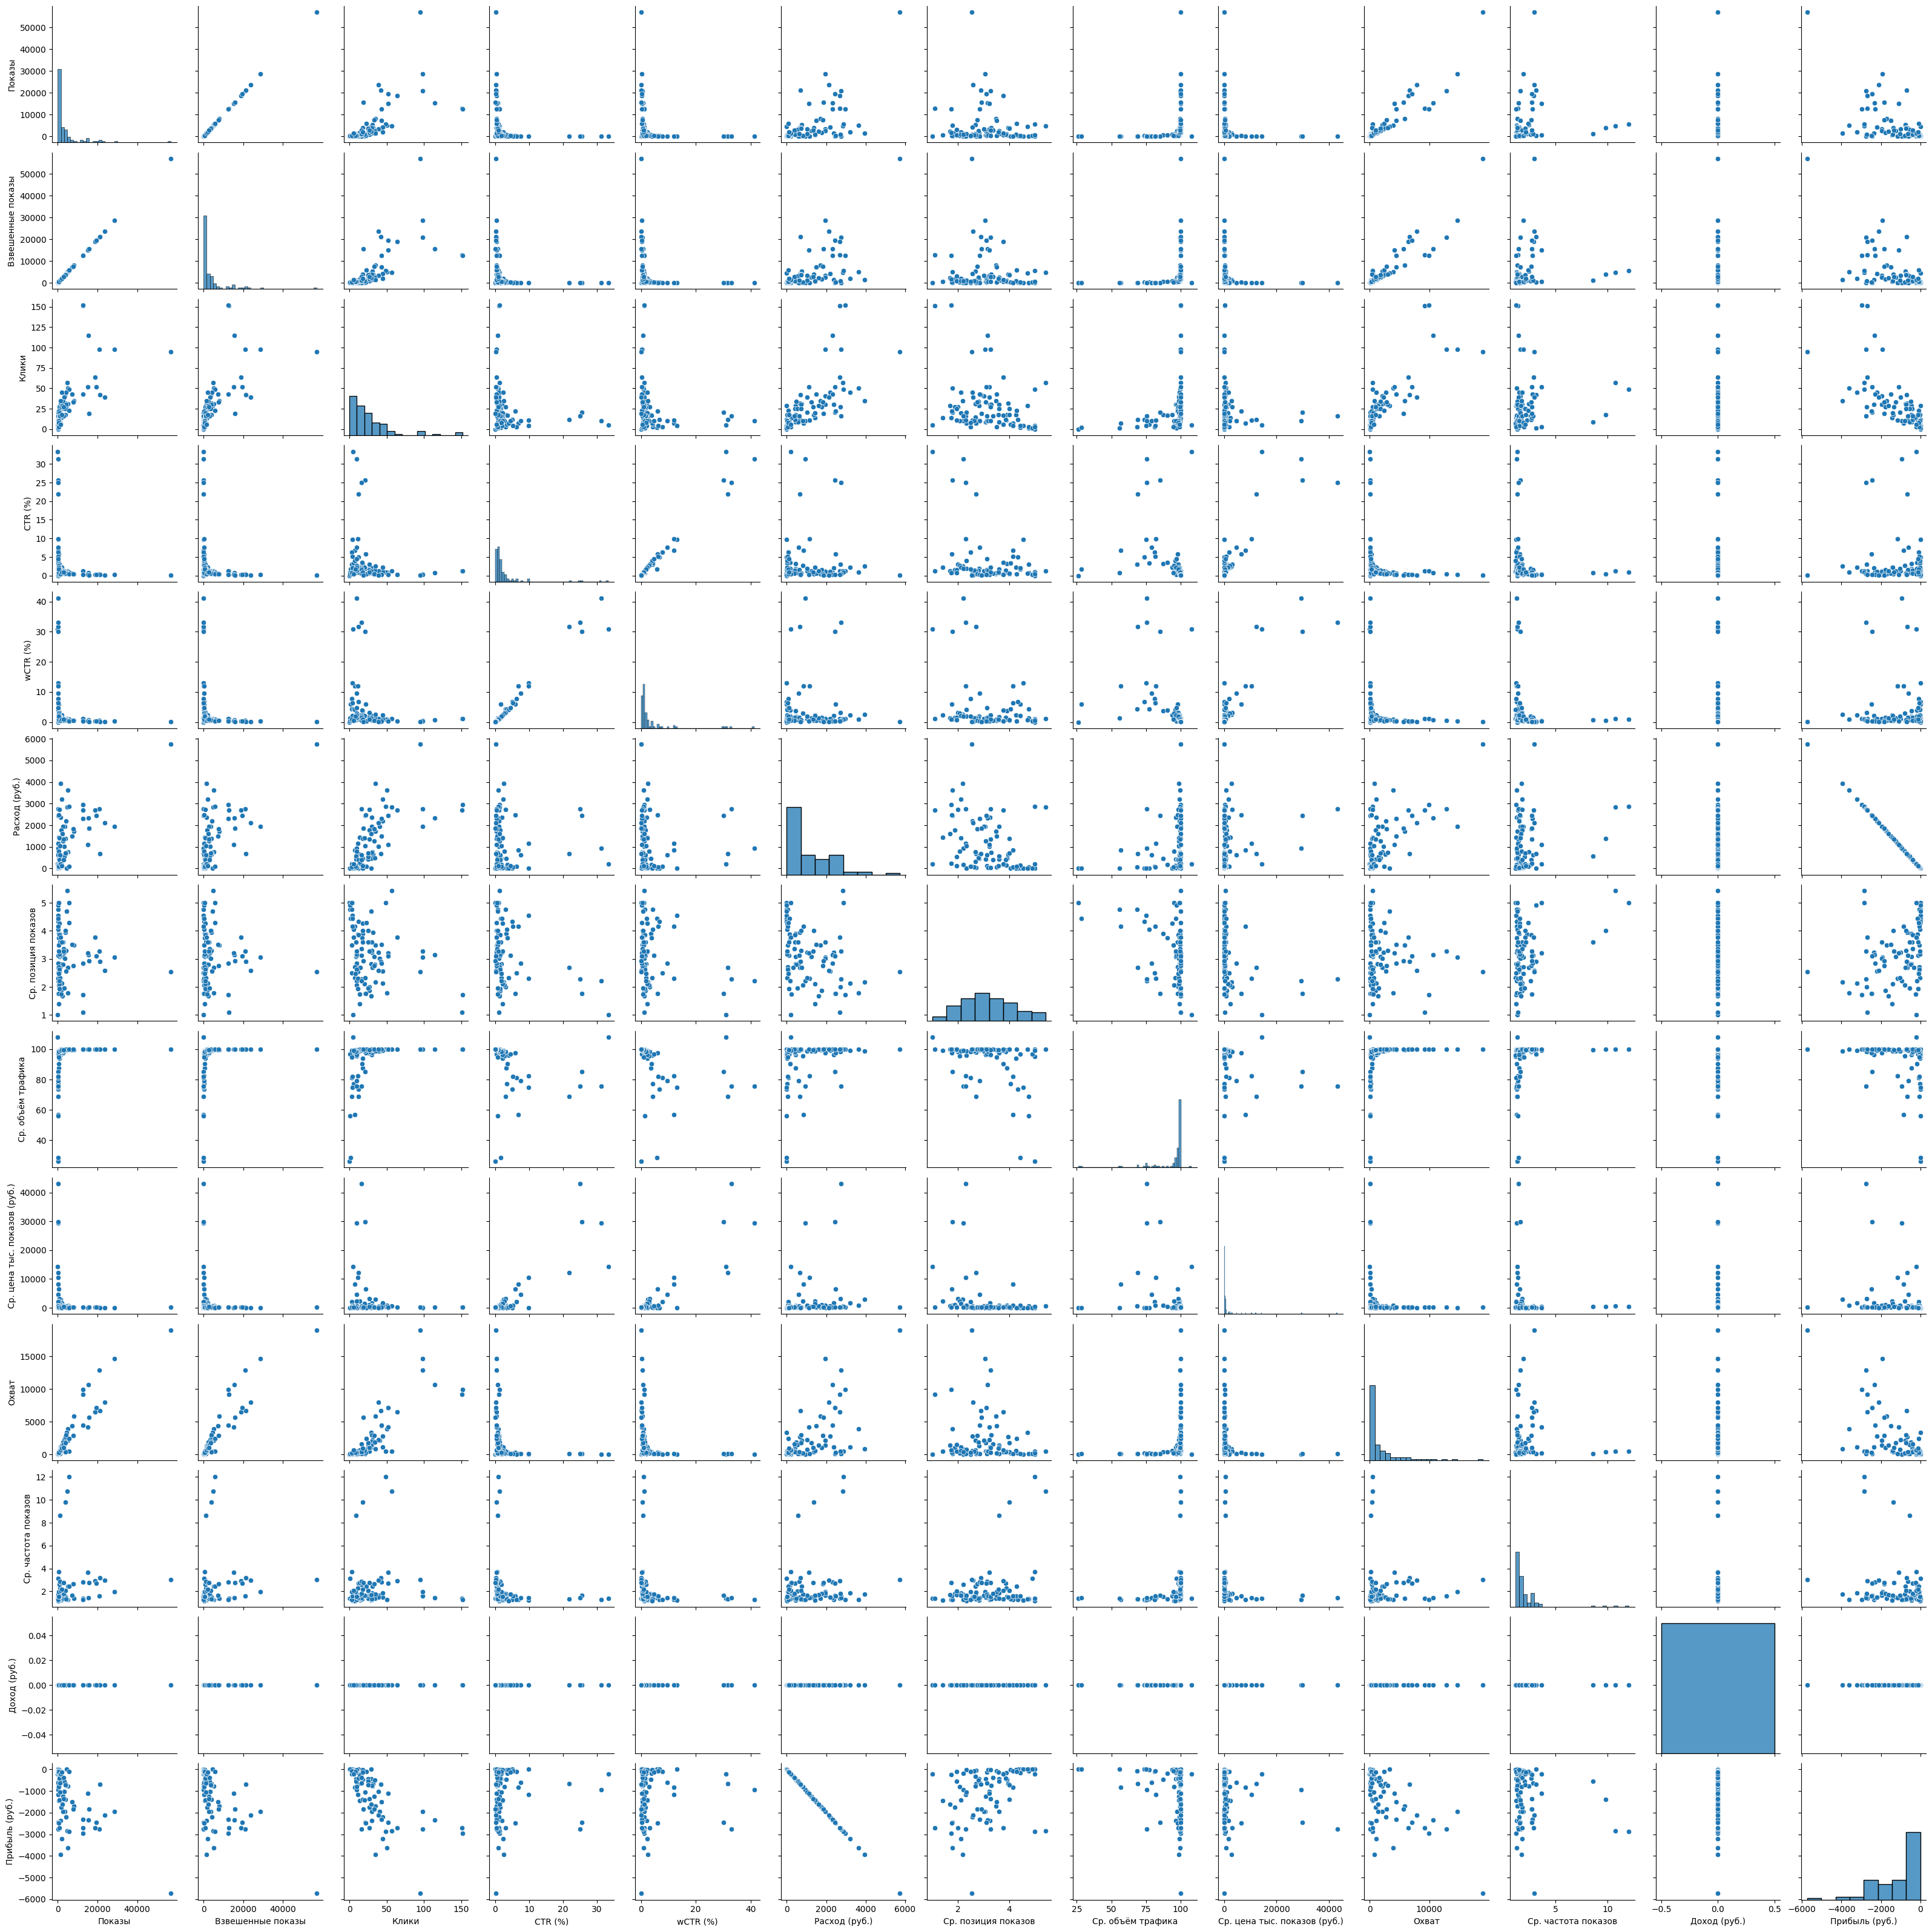

In [73]:
sns.pairplot(cleaned_data)
plt.show()

In [76]:
high_corr_pairs

Index(['Показы', 'Взвешенные показы', 'Клики', 'CTR (%)', 'wCTR (%)',
       'Расход (руб.)', 'Ср. позиция показов', 'Ср. объём трафика',
       'Ср. цена тыс. показов (руб.)', 'Охват', 'Ср. частота показов',
       'Прибыль (руб.)'],
      dtype='object')

In [102]:
treshold = 0.85
correlation_matrix = cleaned_data.corr()

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > treshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

high_corr_pairs

[('Взвешенные показы', 'Показы', 0.9999978269938994),
 ('wCTR (%)', 'CTR (%)', 0.9833066790010047),
 ('Ср. цена тыс. показов (руб.)', 'CTR (%)', 0.8674156645074381),
 ('Ср. цена тыс. показов (руб.)', 'wCTR (%)', 0.8884214832303738),
 ('Охват', 'Показы', 0.9327697463537523),
 ('Охват', 'Взвешенные показы', 0.9326530332549604),
 ('Прибыль (руб.)', 'Расход (руб.)', -1.0)]

In [108]:
to_remove = ['Показы', 'CTR (%)', 'Ср. цена тыс. показов (руб.)', 'Охват', 'Расход (руб.)']

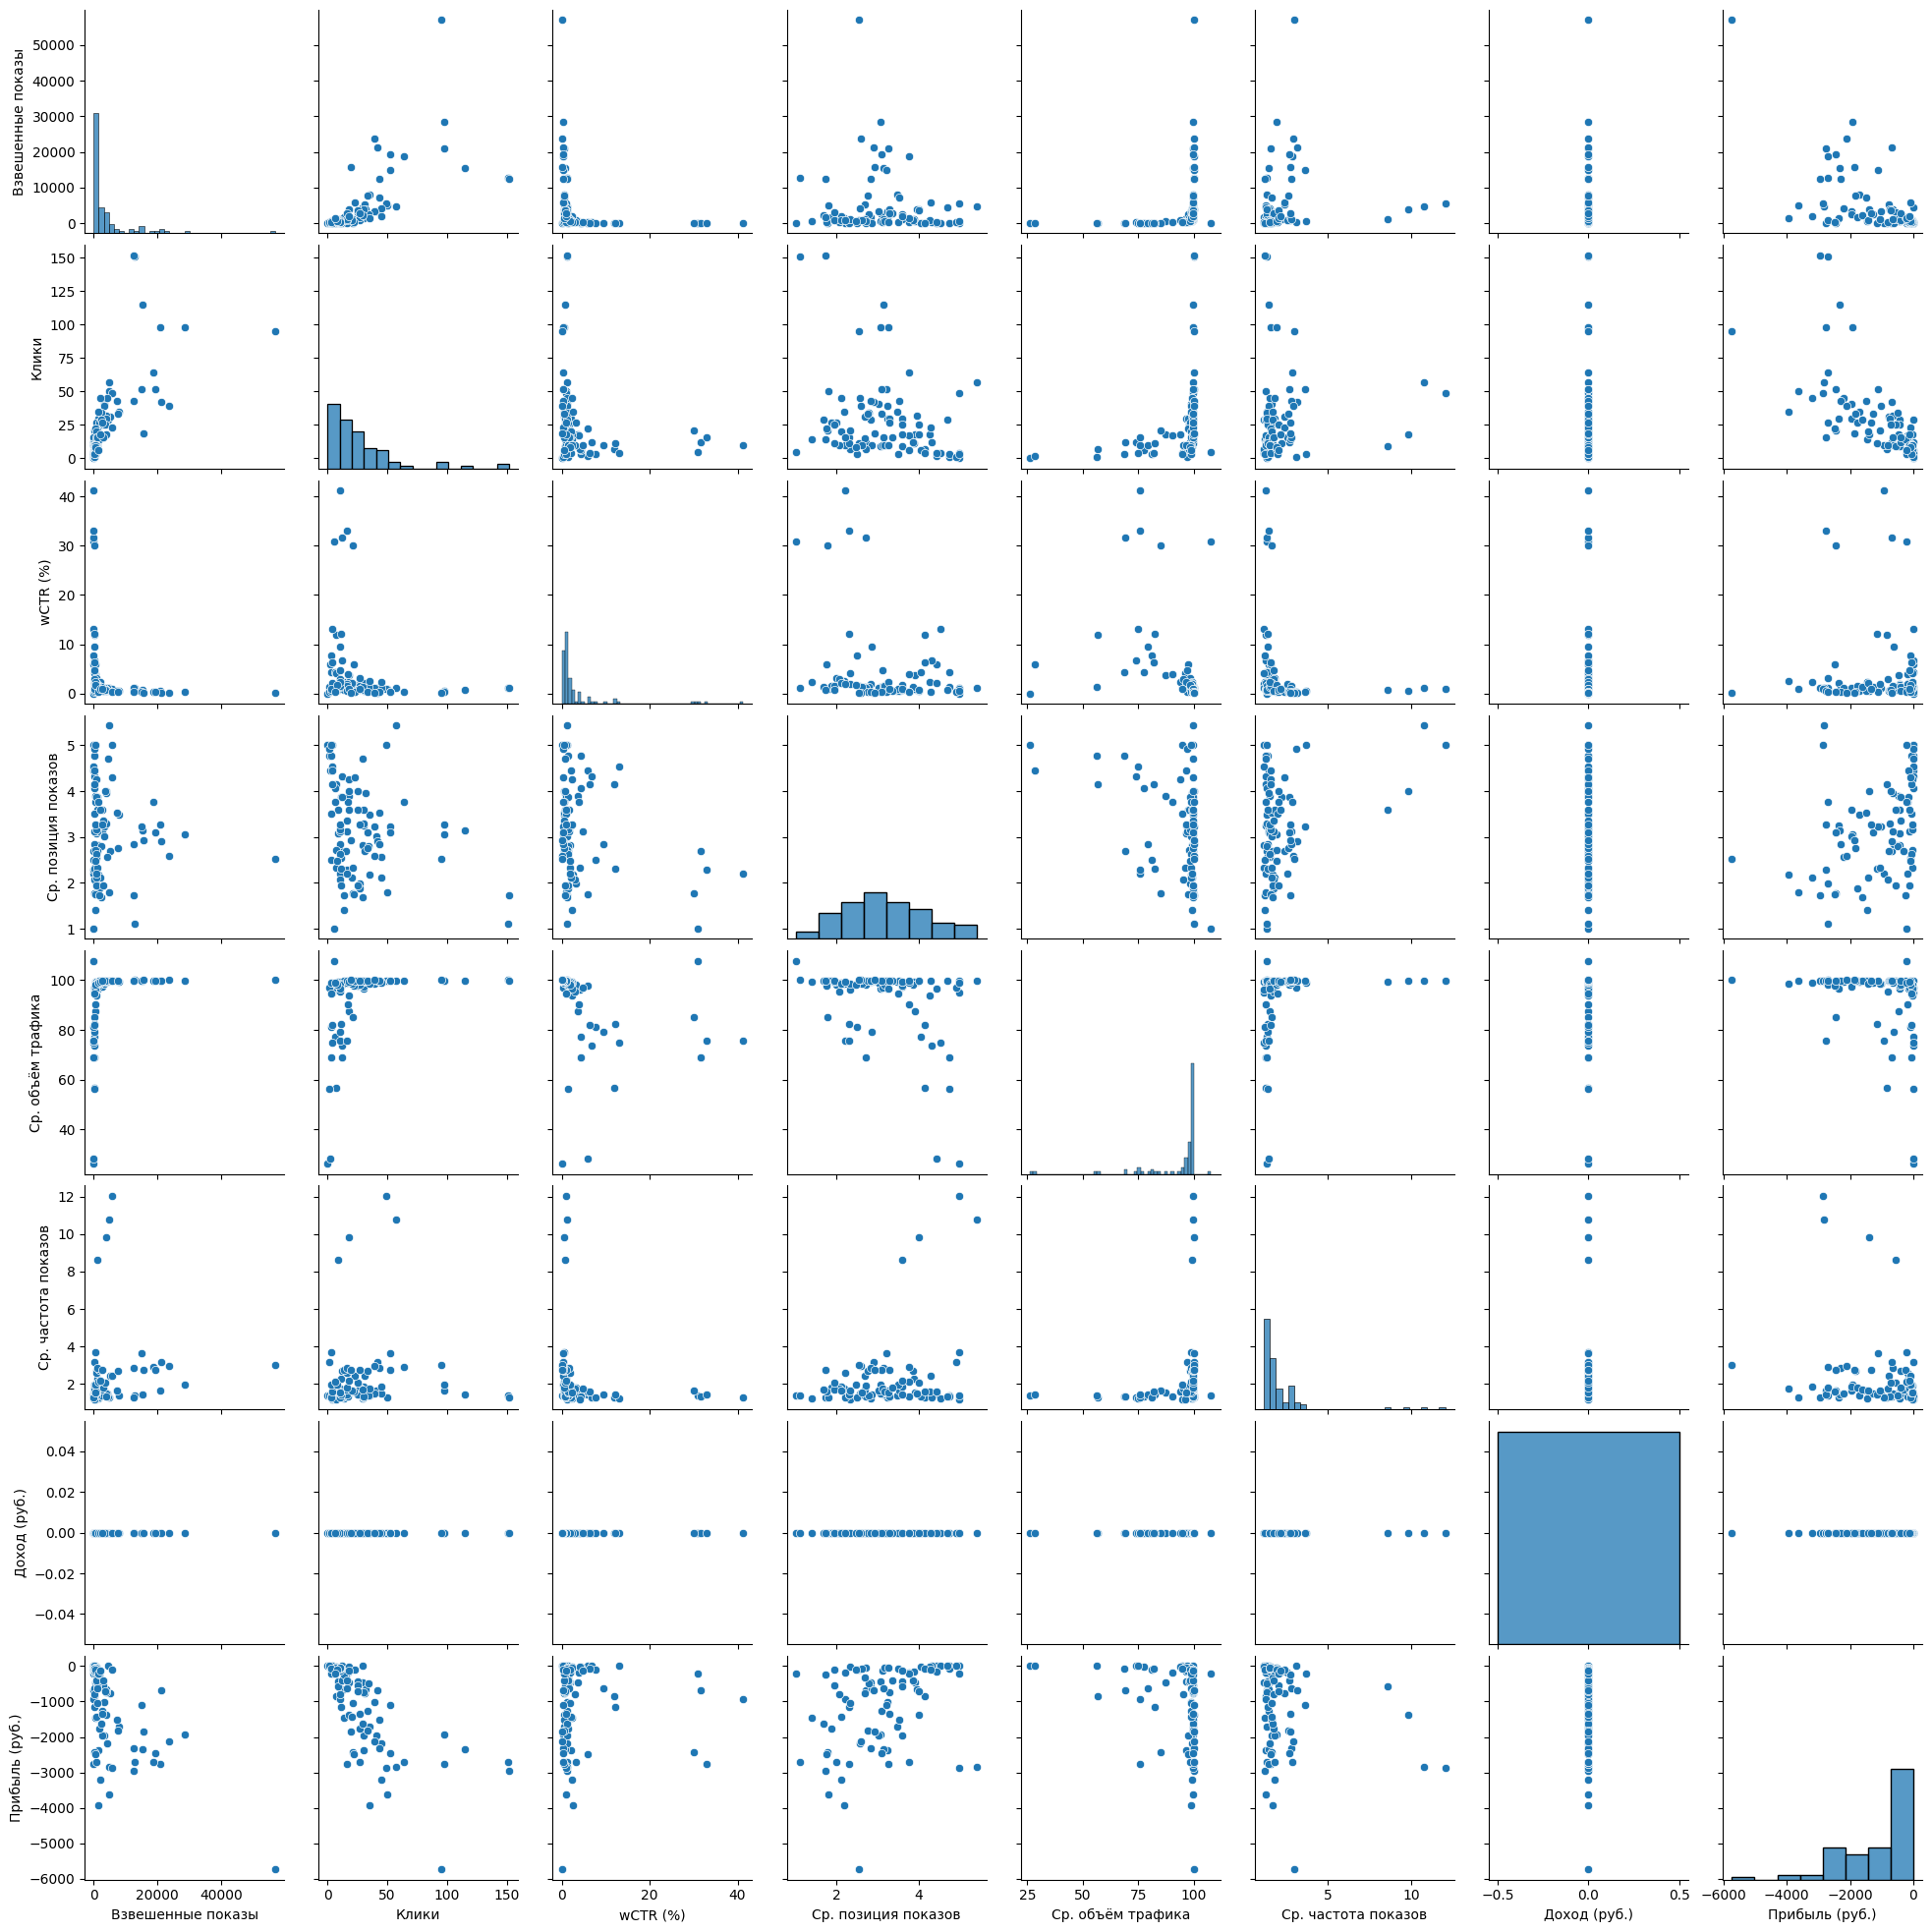

In [109]:
filtered_data = cleaned_data.drop(columns = to_remove)
sns.pairplot(filtered_data)
plt.show()